<h1 align=center>Auto Price Prediction Modelling</h1> 




## Introduction


Agnes wants to sell her car. But the problem is she doesn't know how much she should sell her car for. She wants to sell her car for as much as she can. But she also wants to set the price reasonably, so someone would want to purchase it. So the price she sets should represent the value of the car.

How can we help Agnes determine the best price for her car? What features of cars affect their prices? Color? Brand? Does horsepower also effect the selling price, or perhaps something else? These are some of the questions we can start thinking about. In this noteook we will create a prediction model to determine the price of Agnes's car.

In [2]:
# import pandas library
import pandas as pd

In [3]:
# read in auto data
df = pd.read_csv('~/Downloads/Auto.csv', header = None, encoding = 'utf-8')

In [4]:
df.shape

(205, 26)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [7]:
# replace headers 
df.columns = headers 

In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see, several question marks appeared in the dataframe, those are missing values which may hinder our further analysis. Let's identify all those missing values and deal with them.

In [9]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
# Evaluate missing data
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

#### How to deal with missing data?

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
         <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

In [11]:
# Calculate the average of the normalized losses
avg_norm_loss = df["normalized-losses"].astype('float').mean()
avg_norm_loss

122.0

In [12]:
#replace nan with average
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace = True)

In [13]:
#Calculate the mean value for 'bore' column
avg_bore=df['bore'].astype('float').mean()
avg_bore

3.3297512437810957

In [14]:
#replace nan with average
df['bore'].replace(np.nan, avg_bore, inplace = True)

In [15]:
#Calculate the mean value for 'stroke' column
avg_stroke = df['stroke'].astype('float').mean()
avg_stroke

3.2554228855721337

In [16]:
#replace nan with average
df['stroke'].replace(np.nan,avg_stroke, inplace = True)

In [17]:
# Calculate the average of horsepower
avg_horsepower = df['horsepower'].astype('float').mean()
avg_horsepower

104.25615763546799

In [18]:
#replace nan with average
df['horsepower'].replace(np.nan, avg_horsepower, inplace = True)

In [19]:
#Calculate the mean value for 'peak-rpm' column
avg_peakrpm=df['peak-rpm'].astype('float').mean()
avg_peakrpm

5125.369458128079

In [20]:
#replace nan with average
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace = True)

Replace by frequency

In [21]:
#count highest frequency of number of doors
df['num-of-doors'].value_counts().idxmax()

'four'

In [22]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Finally, let's drop all rows that do not have price data

In [23]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], inplace=True)

In [24]:
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [25]:
# Evaluate missing data
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

The last step is making sure that all data is in the correct format.

In [26]:
# list data types for each column 
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type.For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format

In [83]:
# convert data types to correct format

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df[["horsepower"]] = df[["horsepower"]].astype("int")

In [84]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Now we will be go through a couple of different useful exploratory data analysis techniques to answer the question "What are the characteristics that have the most impact on the car price? Let's start with some continous numerical variables.

What if we want to understand the relationship between engine size and price. Could engine size possibly predict the price of a car? One good way to visualize this is using a scatter plot.

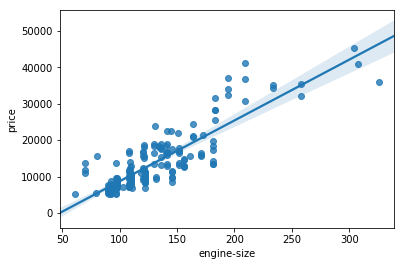

In [43]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

 We can examine the correlation between 'engine-size' and 'price'

In [44]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price 

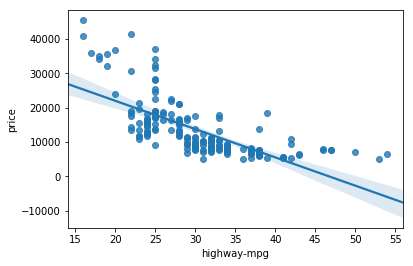

In [45]:
sns.regplot(x="highway-mpg", y="price", data=df)

As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

We can examine the correlation between 'highway-mpg' and 'price'

In [46]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


Let's see if "Peak-rpm" is a predictor variable of "price".

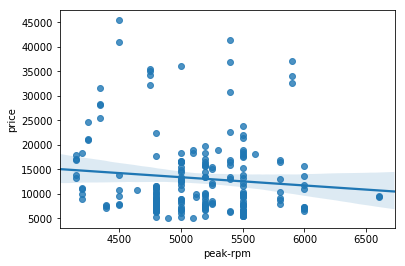

In [47]:
sns.regplot(x="peak-rpm", y="price", data=df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

We can examine the correlation between 'peak-rpm' and 'price'

In [48]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Let's look at some categorical variables, we'll start with the relationship between "body-style" and "price".

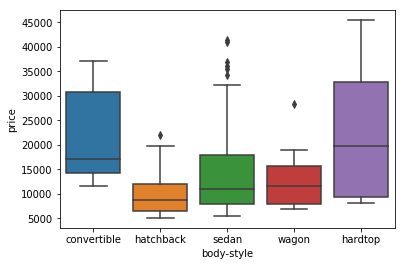

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="body-style", y="price", data=df)
plt.show()

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price"

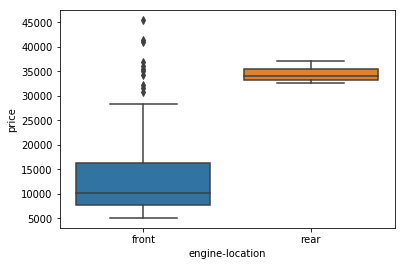

In [40]:
sns.boxplot(x="engine-location", y="price", data=df)
plt.show()

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

 Let's examine "drive-wheels" and "price".

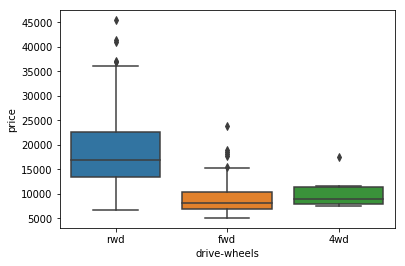

In [41]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.show()

Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

 let's understand how many units of each characteristic/variable we have

In [55]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts

,drive-wheels
fwd,118
rwd,75
4wd,8


In [56]:
# rename drive wheels
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [59]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engine-location'

In [61]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

In [63]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table

In [64]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well.

In [65]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Let's use a heat map to visualize the relationship between Body Style vs Price.

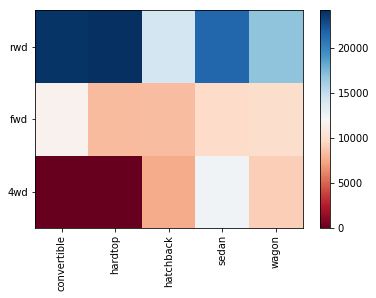

In [117]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

#### ANOVA: Analysis of Variance

we want to test whether there are significant differences between the means of two or more groups of drive wheels. If our price variable is strongly correlated with the drive wheels, we expect ANOVA to return a sizeable F-test score and a small p-value

In [118]:
# group by drive-wheels
grouped_test2 = df[['drive-wheels' , 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [119]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

we can use the function 'f_oneway' in the module 'stats'  to obtain the <b>F-test score</b> and <b>P-value</b>.

In [123]:
# ANOVA

from scipy import stats

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
f_val , p_val

(67.95406500780399, 3.3945443577151245e-23)

This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

#### fwd and rwd

In [125]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
f_val , p_val

(130.5533160959111, 2.2355306355677845e-23)

#### 4wd and rwd

In [127]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price']) 
f_val , p_val

(8.580681368924756, 0.004411492211225333)

#### 4wd and fwd

In [128]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])
f_val, p_val

(0.665465750252303, 0.41620116697845666)

Our main question we wanted to answer in this notebook, is "What are the main characteristics which have the most impact on the car price?"

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?

### Wheel-base vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'

In [77]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
pearson_coef , p_value

(0.5846418222655081, 8.076488270732955e-20)

#### Conclusion:

Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

### Horsepower vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'

In [85]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
pearson_coef, p_value

(0.8096068016571052, 6.273536270651004e-48)

#### Conclusion:

Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

### Length vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'

In [86]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
pearson_coef, p_value

(0.690628380448364, 8.016477466159053e-30)

#### Conclusion:

Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

### Width vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price'

In [88]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
pearson_coef, p_value

(0.7512653440522673, 9.20033551048166e-38)

#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751)

### Curb-weight vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price'

In [89]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
pearson_coef, p_value

(0.8344145257702846, 2.1895772388936997e-53)

#### Conclusion:

Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

### Engine-size vs Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price'

In [90]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
pearson_coef, p_value

(0.8723351674455185, 9.265491622197996e-64)

#### Conclusion:

Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872)

### Bore vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price'

In [93]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
pearson_coef, p_value

(0.5431553832626602, 8.049189483935364e-17)

#### Conclusion:

Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

### City-mpg vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'city-mpg' and 'price'

In [94]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
pearson_coef,p_value

(-0.6865710067844677, 2.3211320655676368e-29)

#### Conclusion:

Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

### Highway-mpg vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'Highway-mpg' and 'price'

In [95]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
pearson_coef, p_value

(-0.7046922650589529, 1.7495471144476807e-31)

#### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

### Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>

### Model Development 

We will now examine model development by trying to predict the price of a car using our dataset. One example of a Data  Model that we will be using is <b>Simple Linear Regression</b>.


$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$


<b>Linear function:</b>
$$
Yhat = a + b  X
$$

In [130]:
# load modules for linear regression

from sklearn.linear_model import LinearRegression

In [131]:
# Create linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### How could Highway-mpg help us predict car price?

For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [132]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg

In [133]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 We can output a prediction 

In [134]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

#### What is the value of the intercept (a)?

In [135]:
lm.intercept_

38423.305858157386

#### What is the value of the Slope (b)?

In [136]:
lm.coef_

array([-821.73337832])

#### What is the final estimated linear model we get?

As we saw above, we should get a final linear model with the structure:


$$
Yhat = a + b  X
$$


Plugging in the actual values we get:

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>


As seen previously we know that other good predictors of price could be:
    
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

It would make more sense developing a <b>Multiple linear Regression Model</b>

The equation is given by

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


In [141]:
# Sellect required columns 
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z.head(2)

,horsepower,curb-weight,engine-size,highway-mpg
0,111,2548,130,27
1,111,2548,130,27


In [143]:
# fit a linear mddel
lm.fit(Z,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [144]:
# obtain the intercept
lm.intercept_

-15811.863767729243

In [145]:
# obtain the slope
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<b>Price</b> = -15678.742628061467 + 53.53022809 x <b>horsepower</b> + 4.70805253 x <b>curb-weight</b> + 81.51280006 x <b>engine-size</b> + 36.1593925 x <b>highway-mpg</b>

### Model Evaluation 

How do we evaluate our models and how do we choose the best one? 

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>
    
Let's visualize Horsepower as potential predictor variable of price

#### Simple Linear Regression

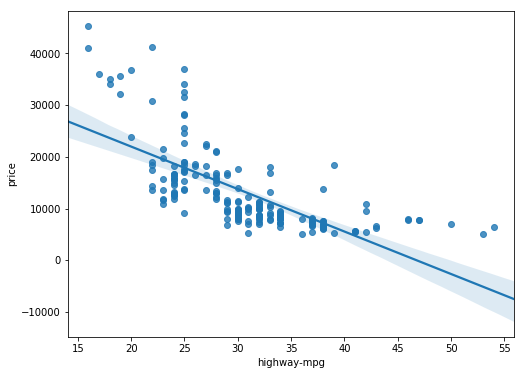

In [151]:
plt.figure(figsize=(8,6))
sns.regplot(x="highway-mpg", y="price", data=df)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.Let's compare this plot to the regression plot of "peak-rpm".

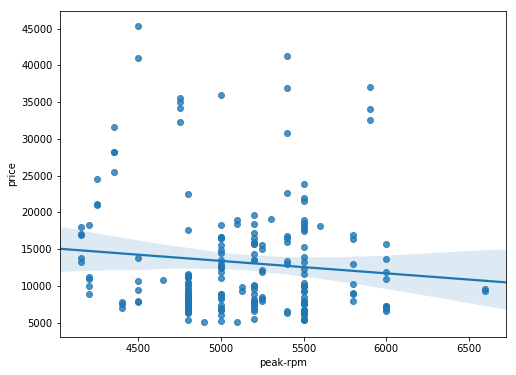

In [153]:
plt.figure(figsize=(8,6))
sns.regplot(x="peak-rpm", y="price", data=df)

Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases. Let's therefore visualize the variance of the data

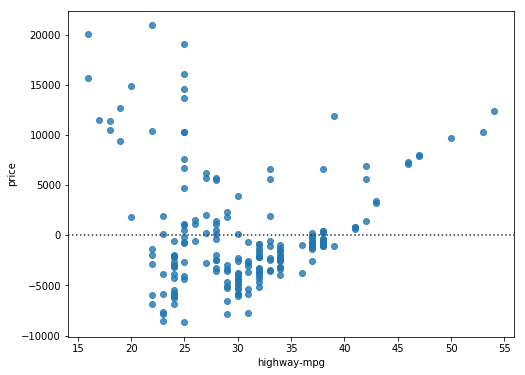

In [155]:
plt.figure(figsize=(8,6))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a linear model is appropriate for the data, randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data. However , we can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

#### Multiple Linear Regression

We will visualize a model for Multiple Linear Regression by looking at the <b>distribution plot</b> because we can't visualize it with regression or residual plot.

In [158]:
# first lets make a prediction 

Y_hat = lm.predict(Z)

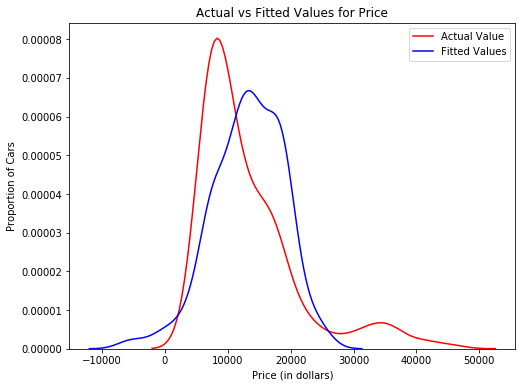

In [160]:
plt.figure(figsize=(8,6))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

#### Polynomial Regression

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

In [197]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new)
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()

In [198]:
# getting the variables

x = df['highway-mpg']
y = df['price']

In [202]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


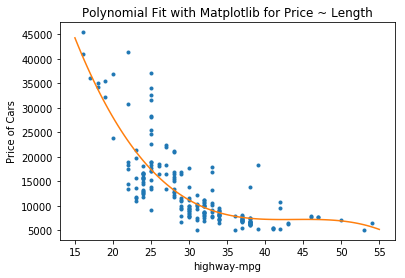

In [200]:
# plotting the funtion

PlotPolly(p, x, y, 'highway-mpg')

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.

### Measures for In-Sample Evaluation

It is important for us to now quantitativiley measure and determine how accurate the model is

We will determine the accuracy of the model by:</p>
<ul>
    <li><b>R^2 / R-squared</b></li> Indicates how close the data is to the fitted regression line
    <li><b>Mean Squared Error (MSE)</b></li> measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ)
</ul>

#### Model 1: Simple Linear Regression

Let's calculate the R^2

In [220]:
#highway_mpg_fit
lm.fit(X, Y)

# Find the R^2
lm.score(X, Y)

0.4965911884339175

Let's calcluate the MSE

In [221]:
# predict the output
Yhat=lm.predict(X)

In [222]:
# import the function mse from the module metrics
from sklearn.metrics import mean_squared_error

In [223]:
mse = mean_squared_error(Y, Yhat)
mse

31635042.944639895

#### Model 2: Multiple Linear Regression

Let's calculate the R^2

In [213]:
# fit the model 
lm.fit(Z,Y)

# Find the R^2
lm.score(Z,Y)

0.8093732522175299

Let's calculate the MSE

In [214]:
# predict the output
Y_hat2 = lm.predict(Z)

In [224]:
mse2 = mean_squared_error(Y, Y_hat2)
mse2

11979300.349818885

#### Model 3: Polynomial Fit

Let's calculate the R^2

In [225]:
# import the function r2_score from the module metrics as we are using a different function
from sklearn.metrics import r2_score

In [228]:
r_squared = r2_score(y, p(x))
r_squared

0.6741946663906513

Let's calculate MSE

In [229]:
mean_squared_error(df['price'], p(x))

20474146.42636125

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits. The model with the higher R-squared value and the smallest MSE value is a better fit for the data.

#### Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)

<ul>
    <li>The <b>MSE</b> of SLR is 31635042.944639895 while MLR has an MSE of 11979300.349818885.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>:The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

#### Simple Linear Model (SLR) vs Polynomial Fit

<ul>
    <li>The <b>MSE</b> of SLR is 31635042.944639895 while Polynomial fit has an MSE of 20474146.42636125.  The MSE of Polynomial fit is much smaller.
    <li><b>R-squared</b>:The R-squared for the SLR (~0.497) is very small compared to the R-squared for the Polynomial fit (~0.674).</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>

#### Multiple Linear Regression (MLR) vs Polynomial Fit

<ul>
    <li>The <b>MSE</b> of MLR is 11979300.349818885 while Polynomial fit has an MSE of 20474146.42636125.  The MSE of MLR is much smaller.
    <li><b>R-squared</b>:The R-squared for the MLR (~0.809) is higher compared to the R-squared for the Polynomial fit (~0.674).</li>
</ul>

## Conclusion:

We conclude that <b>the MLR model is the best model</b> to be able to predict the price of Agnes's car. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$
